In [2]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

%matplotlib inline 

# The `.plot()` method

In [12]:
bb  = data.get_data_morningstar('YHOO',  start='2007-07-01', end='2008-08-31')

In [17]:
bb.head(3)
bb.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 305 entries, (YHOO, 2007-07-02 00:00:00) to (YHOO, 2008-08-29 00:00:00)
Data columns (total 5 columns):
Close     305 non-null float64
High      305 non-null float64
Low       305 non-null float64
Open      305 non-null float64
Volume    305 non-null int64
dtypes: float64(4), int64(1)
memory usage: 15.3+ KB


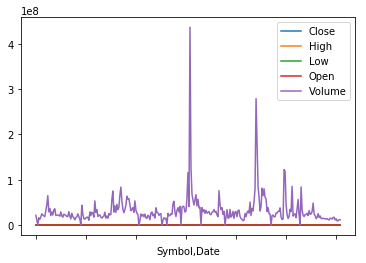

In [14]:
bb.plot()

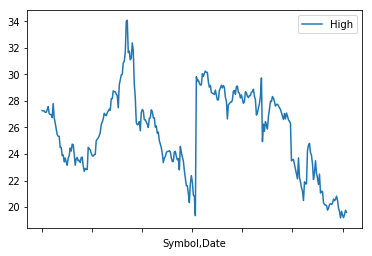

In [15]:
bb.plot(y='High')

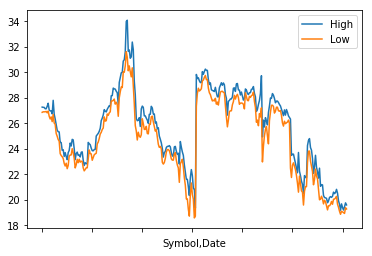

In [16]:
bb[['High','Low']].plot()

# Modifying Aesthetics

In [18]:
bb  = data.get_data_morningstar('YHOO',  start='2007-07-01', end='2008-08-31')

In [19]:
# all the styles...
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

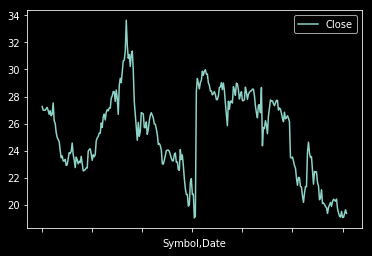

In [21]:
plt.style.use('dark_background')
bb.plot(y='Close')

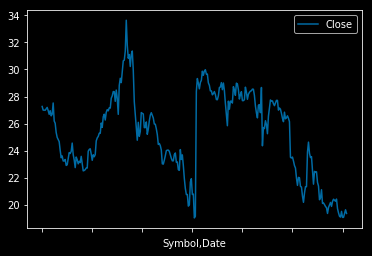

In [22]:
plt.style.use('tableau-colorblind10')
bb.plot(y='Close')

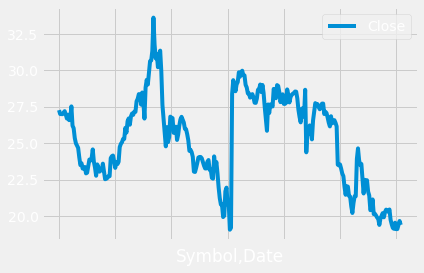

In [23]:
plt.style.use('fivethirtyeight')
bb.plot(y='Close')

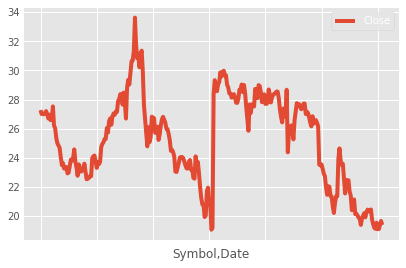

In [24]:
plt.style.use('ggplot')
bb.plot(y='Close')

# Bar Charts

In [27]:
bb = data.DataReader(name='GOOG', data_source='yahoo', start='2004-01-01', end='2018-06-23')

In [28]:
bb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


In [29]:
def rank_performant(stock_price):
    if stock_price <= 200:
        return 'poor'
    elif stock_price > 200 and stock_price <= 500:
        return 'satifactory'
    else:
        return 'stellar'
    
    

In [31]:
bb['Close'].apply(rank_performant).value_counts()

satifactory    1716
stellar        1168
poor            602
Name: Close, dtype: int64

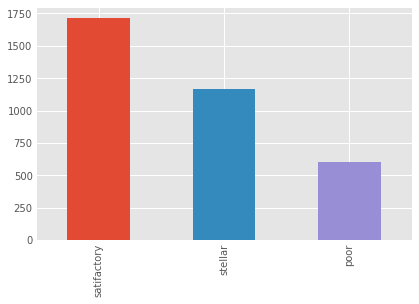

In [33]:
bb['Close'].apply(rank_performant).value_counts().plot(kind='bar')

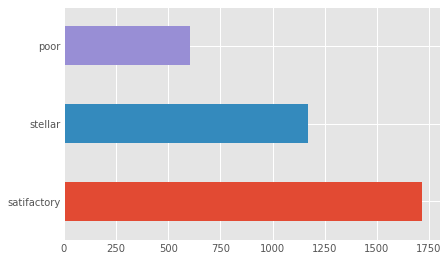

In [34]:
# barh - horizontal bar
bb['Close'].apply(rank_performant).value_counts().plot(kind='barh')

# Pie Charts

In [35]:
apple = data.DataReader(name='AAPL', data_source='yahoo', start='2012-01-01', end='2018-06-23')
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,39.616493
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,39.829411
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,40.271591
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,40.692574
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,40.628036


In [36]:
apple['Close'].mean()

108.3051214060072

In [37]:
def rank_performance(stock_price):
    if stock_price >= 108.3051214060072:
        return 'above average'
    else:
        return 'below average'

In [38]:
apple['Close'].apply(rank_performance).value_counts()

below average    887
above average    742
Name: Close, dtype: int64

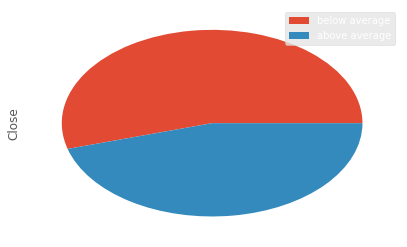

In [40]:
apple['Close'].apply(rank_performance).value_counts().plot(kind='pie', legend=True)

# Histograms

In [41]:
google = data.DataReader(name='GOOG', data_source='yahoo', start='2004-01-01', end='2018-06-23')
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


In [42]:
def custom_round(stock_price):
    return int(stock_price/100.0) * 100

In [45]:
google['High'].apply(custom_round).value_counts().sort_index()

0        159
100      419
200     1138
300      439
400      154
500      416
600      105
700      276
800       89
900      127
1000     103
1100      61
Name: High, dtype: int64

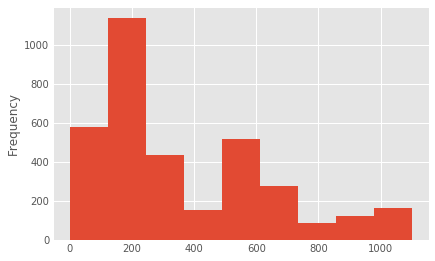

In [47]:
google['High'].apply(custom_round).plot(kind='hist', bins=9)